# Sentiment Analysis

This stage of the project is dedicated to Sentiment Analysis, or popularly called 'opinion mining'. The aim is to determine the overall contextual polarity of a review. In this sense, a review is a reaction of a person to their experience in an establishment. 

This analysis does not determines if a sentence is objective or subjective, fact or opinion. Results of the text analysis will be shown as *positive*, *negative* or *neutral* opinion.

I will use NLTK Sentiment Analyser VADER for the analysis, and the target labels will be the variable 'stars' which indicates the rate of positive, negative or neutral opinion a user had in the review.

<ul>
    <li>1. Imports</li>
    <li>2. Data</li>
    <li>3. Sentiment Analysis</li>
        <ul>
            <li>3.1 Testing VADER with a random review</li>
            <li>3.2 Computing polarity scores</li>
            <li>3.3 Comparison Analysis of the compound score and the original label</li> 
            <ul>
            <li>4.1 Testing TextBlob with a random review</li>
            <li>4.2 Computing polarity scores</li>
            <li>4.3 Comparison Analysis of the compound score and the original label</li>
            
       
</ul>

# 1. Imports

In [21]:
#basic libraries for linear algebra and data procesing
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#comparison analysis metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

#time and warnings
import time
import warnings

#settings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_context('poster', font_scale=0.5)

# 2. Data

In [22]:
#loading the review dataset
review = pd.read_csv('data/review_prepared.csv')

In [23]:
review.columns

Index(['Unnamed: 0', 'business_categories', 'business_city',
       'business_full_address', 'business_id', 'business_latitude',
       'business_longitude', 'business_name', 'business_open',
       'business_review_count', 'business_stars', 'business_state', 'cool',
       'date', 'funny', 'review_id', 'reviewer_average_stars',
       'reviewer_blank', 'reviewer_cool', 'reviewer_funny', 'reviewer_name',
       'reviewer_review_count', 'reviewer_useful', 'stars', 'text', 'useful',
       'user_id', 'review_length'],
      dtype='object')

In [24]:
#filtering out the stars and text columns
reviews = review[['text', 'stars']].reset_index().drop(columns='index')

In [25]:
print(reviews.shape)
reviews.head()

(229130, 2)


,text,stars
0,My wife took me here on my birthday for breakf...,5
1,I have no idea why some people give bad review...,5
2,love the gyro plate. Rice is so good and I als...,4
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5
4,General Manager Scott Petello is a good egg!!!...,5


# 3. Sentiment Analysis

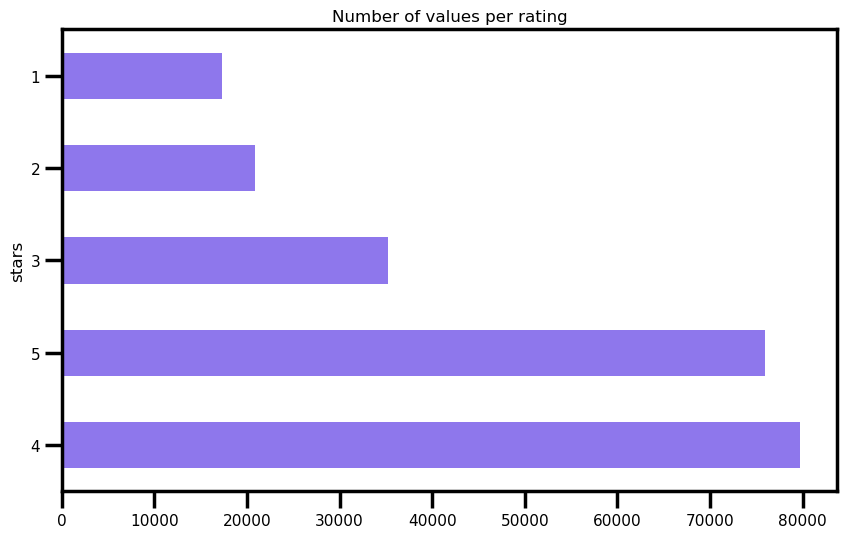

In [26]:
#number of values per star rating
reviews['stars'].value_counts().plot.barh(color = '#8e77ec', figsize = (10,6), title = 'Number of values per rating');

## 3.1 Testing VADER with a random review

In [27]:
#creating a sid object from the VADER
import nltk
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\besid\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**Test 1**

In [28]:
examplerow = 6666
test_sid_scores = sid.polarity_scores(reviews.loc[examplerow]['text'])
test_target_star = reviews.loc[examplerow]['stars']

print('VADER polarity score: ', test_sid_scores)
print('Actual target star: ', test_target_star)
print('Actual review text:', reviews.text[examplerow])

VADER polarity score:  {'neg': 0.058, 'neu': 0.829, 'pos': 0.114, 'compound': 0.8602}
Actual target star:  2
Actual review text: I have been here a couple of times as it is about a block from where I live. It is your typical neighborhood bar. That is, not a lot of people, average prices, okay happy hour.

Their menu is bar food. Burgers, Wings, Fries, and so on. The have the standard domestics on tap (Bud, Coors, Miller etc).

A lot of times they have live music at 9 or 10. If this is for you then you have the chance to see an exclusive performance since not a lot of patrons are there. However, it gets pretty loud. So if this does not sound like your thing, be aware what time it is. 

Service is pretty bad if you are in the "restaurant" part. The only time I have eaten at a table the bartender was also our server. Needless to say slow is an understatement. 

The only reason I go here is so I don't have to drive anywhere. 2 stars because I have experienced better, much better. My experi

**Test 2**

In [29]:
test2_sid_scores = sid.polarity_scores(reviews.loc[183761]['text'])
test2_target_star = reviews.loc[183761]['stars']

print('VADER polarity score: ', test2_sid_scores)
print('Actual target star: ', test2_target_star)
print('Actual review text:', reviews.text[183761])

VADER polarity score:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Actual target star:  5
Actual review text: Fan-friggin-tastic!


**Test 3**

In [30]:
test3_sid_scores = sid.polarity_scores(reviews.loc[92701]['text'])
test3_target_star = reviews.loc[92701]['stars']

print('VADER polarity score: ', test3_sid_scores)
print('Actual target star: ', test3_target_star)
print('Actual review text:', reviews.text[92701])

VADER polarity score:  {'neg': 0.279, 'neu': 0.543, 'pos': 0.178, 'compound': -0.3182}
Actual target star:  3
Actual review text: Was cool, then last summer the music got shitty.


## 3.2 Computing polarity scores using compound scores

In [31]:
#creating labels from stars
reviews['label'] = reviews['stars'].apply(lambda s: 'positive' if s >= 4 else ('negative' if s <= 2 else 'neutral'))

In [38]:
%%time

#creating columns in the dataframe that contain relevant data from the polarity scores
reviews['polarity_scores'] = reviews['text'].apply(lambda text: sid.polarity_scores(str(text)))
reviews['compound_score']  = reviews['polarity_scores'].apply(lambda score_dict: score_dict['compound'])
reviews['compound_label'] = reviews['compound_score'].apply(lambda s: 'negative' if s < 0 else ('neutral' if s < 0.5 else 'positive'))
reviews.head()

CPU times: total: 3min 50s
Wall time: 6min 18s


,text,stars,label,polarity_scores,compound_score,compound_label
0,My wife took me here on my birthday for breakf...,5,positive,"{'neg': 0.015, 'neu': 0.687, 'pos': 0.298, 'co...",0.9950,positive
1,I have no idea why some people give bad review...,5,positive,"{'neg': 0.049, 'neu': 0.741, 'pos': 0.21, 'com...",0.9943,positive
2,love the gyro plate. Rice is so good and I als...,4,positive,"{'neg': 0.0, 'neu': 0.523, 'pos': 0.477, 'comp...",0.8988,positive
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5,positive,"{'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'comp...",0.9531,positive
4,General Manager Scott Petello is a good egg!!!...,5,positive,"{'neg': 0.029, 'neu': 0.636, 'pos': 0.334, 'co...",0.9883,positive


## 3.3 Comparison Analysis of compound score and original label

In [39]:
print('Accuracy score: ', accuracy_score(reviews.label, reviews.compound_label))

Accuracy score:  0.7144895910618426


In [ ]:
print('Classification Report:\n', classification_report(reviews.label, reviews.compound_label))

In [40]:
print(confusion_matrix(reviews.label, reviews.compound_label))

[[ 14802   5341  18102]
 [  3332   3487  28449]
 [  3728   6467 145422]]


In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(reviews.label, reviews.compound_label), 
                              display_labels=['negative', 'neutral', 'positive'])

disp.plot()
plt.show;

### F1 Score 

The F1 score is a measure used to evaluate the performance of a classification model. It considers both precision and recall to provide a single metric that balances both concerns.

- **Precision** is the ratio of correctly predicted positive observations to the total predicted positives. It answers the question: *How many selected items are relevant?*
  
  \[
  \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
  \]

- **Recall** is the ratio of correctly predicted positive observations to all observations in the actual class. It answers the question: *How many relevant items are selected?*
  
  \[
  \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
  \]

- **F1 Score** is the harmonic mean of precision and recall, giving equal weight to both metrics. It ranges between 0 and 1, where 1 is the best score.

  \[
  \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
  \]

### Simple Example

Imagine you have a spam filter for emails. Out of 100 emails, 40 are actually spam and 60 are not. Your filter identified 50 emails as spam, out of which 30 are correctly identified (True Positives) and 20 are wrongly identified as spam (False Positives). The filter also missed 10 spam emails (False Negatives).

- **Precision**: Out of 50 emails marked as spam, 30 were actually spam.
  
  \[
  \text{Precision} = \frac{30}{50} = 0.60
  \]

- **Recall**: Out of 40 actual spam emails, 30 were correctly identified.
  
  \[
  \text{Recall} = \frac{30}{40} = 0.75
  \]

- **F1 Score**: Combining precision and recall to get a single score.
  
  \[
  \text{F1 Score} = 2 \times \frac{0.60 \times 0.75}{0.60 + 0.75} = 0.67
  \]

### Confusion Matrix Explained

A confusion matrix is a table used to describe the performance of a classification model by comparing the actual labels with the predicted labels. It shows the number of correct and incorrect predictions broken down by each class.

#### Simple Example

For a binary classification problem (spam vs. not spam), the confusion matrix looks like this:

\[
\begin{array}{|c|c|c|}
\hline
& \text{Predicted: Not Spam} & \text{Predicted: Spam} \\
\hline
\text{Actual: Not Spam} & \text{TN} & \text{FP} \\
\hline
\text{Actual: Spam} & \text{FN} & \text{TP} \\
\hline
\end{array}
\]

Where:
- **TN (True Negatives)**: Correctly identified negative instances.
- **FP (False Positives)**: Incorrectly identified positive instances.
- **FN (False Negatives)**: Incorrectly identified negative instances.
- **TP (True Positives)**: Correctly identified positive instances.

#### Given Confusion Matrix

For a multi-class classification problem like yours:

\[
\begin{array}{|c|c|c|c|}
\hline
& \text{Predicted: Negative} & \text{Predicted: Neutral} & \text{Predicted: Positive} \\
\hline
\text{Actual: Negative} & 14802 & 5341 & 18102 \\
\hline
\text{Actual: Neutral} & 3332 & 3487 & 28449 \\
\hline
\text{Actual: Positive} & 3728 & 6467 & 145422 \\
\hline
\end{array}
\]

- **14802**: Negative reviews correctly identified as negative (True Negatives).
- **5341**: Negative reviews incorrectly identified as neutral (False Positives for neutral).
- **18102**: Negative reviews incorrectly identified as positive (False Positives for positive).
- **3332**: Neutral reviews incorrectly identified as negative (False Negatives for neutral).
- **3487**: Neutral reviews correctly identified as neutral (True Neutrals).
- **28449**: Neutral reviews incorrectly identified as positive (False Positives for positive).
- **3728**: Positive reviews incorrectly identified as negative (False Negatives for positive).
- **6467**: Positive reviews incorrectly identified as neutral (False Negatives for neutral).
- **145422**: Positive reviews correctly identified as positive (True Positives).

This matrix helps in understanding where the model is making mistakes and where it is performing well.


In [43]:
# "siebert/sentiment-roberta-large-english" model for your sentiment analysis task. 
# This model is a fine-tuned version of RoBERTa-large and has been trained on 15 diverse datasets,
# making it more robust and generalizable across different types of English text

In [44]:
!pip install transformers

In [45]:
from transformers import pipeline

In [54]:
# Importing necessary libraries.
# Loads the dataset (make sure the file path is correct).
# Applies TextBlob sentiment analysis with a progress bar.
# Calculates and prints the accuracy score.
# Creates and displays a confusion matrix.
# Shows a sample of the results.
# Analyzes and displays a sample of disagreements between original and TextBlob sentiments.
# Prints the distribution of original and TextBlob sentiments.
# Visualizes the distribution of polarity scores.
# Analyzes the percentage of reviews where TextBlob disagrees with the original sentiment.
# Calculates the average TextBlob polarity for each original sentiment category.

In [52]:
# Installing TextBlob as not already installed
!pip install textblob

from textblob import TextBlob
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tqdm import tqdm

# Assuming 'reviews' is your DataFrame and it has 'text' and 'label' columns

print("Applying TextBlob sentiment analysis...")

def get_textblob_sentiment(text):
    analysis = TextBlob(str(text))
    polarity = analysis.sentiment.polarity
    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

    
    # Apply sentiment analysis with progress bar
tqdm.pandas()
reviews['textblob_sentiment'] = reviews['text'].progress_apply(get_textblob_sentiment)
reviews['textblob_polarity'] = reviews['text'].progress_apply(lambda x: TextBlob(str(x)).sentiment.polarity)

Applying TextBlob sentiment analysis...


100%|█████████████████████████████████████████████████████████████████████████| 229130/229130 [04:25<00:00, 862.63it/s]


In [53]:
# Calculate and print accuracy
print('Accuracy score: ', accuracy_score(reviews.label, reviews.textblob_sentiment))

Accuracy score:  0.6773840178064854


In [55]:
# Create and display confusion matrix
cm = confusion_matrix(reviews.label, reviews.textblob_sentiment)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[  6220  17930  14095]
 [   754   7977  26537]
 [  1184  13421 141012]]


<Figure size 1000x800 with 0 Axes>

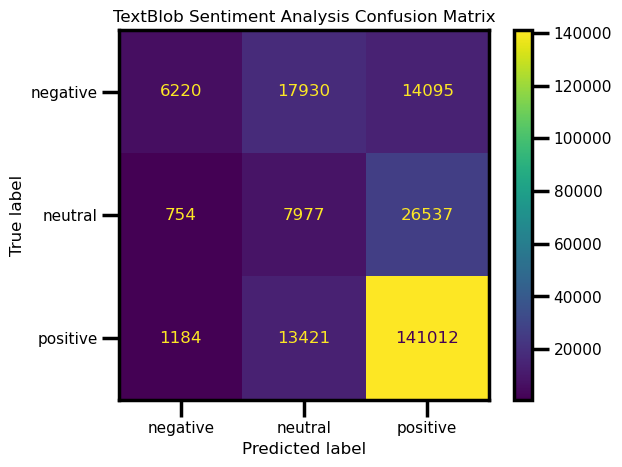

In [56]:
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(cm, display_labels=['negative', 'neutral', 'positive'])
disp.plot()
plt.title('TextBlob Sentiment Analysis Confusion Matrix')
plt.show()

In [57]:
# Display the head of the dataframe with new columns
print("\nSample of results:")
print(reviews[['text', 'label', 'textblob_sentiment', 'textblob_polarity']].head())



Sample of results:
                                                text     label  \
0  My wife took me here on my birthday for breakf...  positive   
1  I have no idea why some people give bad review...  positive   
2  love the gyro plate. Rice is so good and I als...  positive   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  positive   
4  General Manager Scott Petello is a good egg!!!...  positive   

  textblob_sentiment  textblob_polarity  
0           positive           0.402469  
1           positive           0.229773  
2           positive           0.566667  
3           positive           0.608646  
4           positive           0.468125  


In [58]:

# Analyze discrepancies
print("\nAnalyzing discrepancies...")
disagreements = reviews[reviews.label != reviews.textblob_sentiment]
print("Sample of disagreements:")
print(disagreements[['text', 'label', 'textblob_sentiment', 'textblob_polarity']].sample(5))



Analyzing discrepancies...
Sample of disagreements:
                                                     text     label  \
156752  Moving from San Diego with one of the best pho...  negative   
127710  I've been to plenty of dumps in my day, but th...  positive   
213284  Dr's here are terrific if you ever can get an ...  negative   
212646  This is close to my house when I need to pick ...  negative   
228721  You know, we get a lot of crap living way out ...  positive   

       textblob_sentiment  textblob_polarity  
156752            neutral           0.068739  
127710            neutral          -0.007143  
213284           positive           0.178795  
212646           positive           0.196491  
228721            neutral           0.046539  


In [ ]:

# Distribution of sentiments
print("\nDistribution of original sentiments:")
print(reviews['label'].value_counts(normalize=True))

print("\nDistribution of TextBlob sentiments:")
print(reviews['textblob_sentiment'].value_counts(normalize=True))


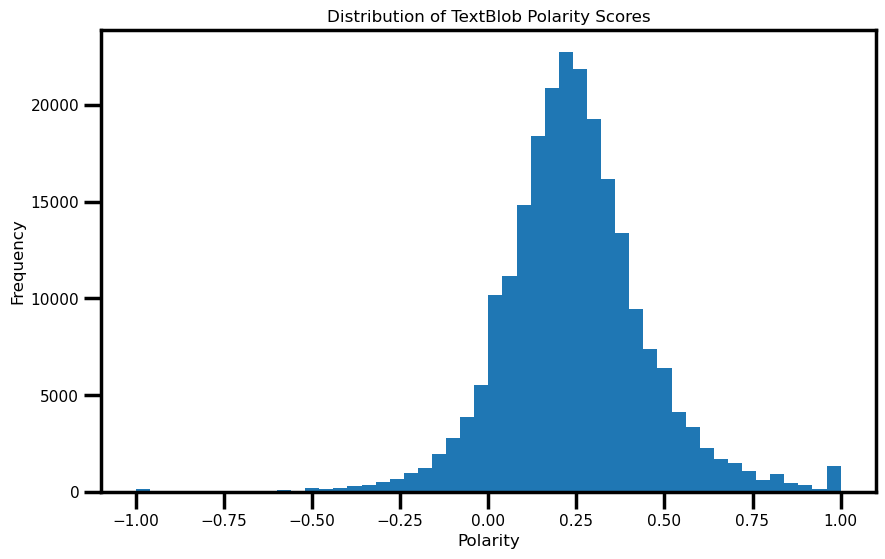

In [59]:
# Visualize polarity distribution
plt.figure(figsize=(10, 6))
plt.hist(reviews['textblob_polarity'], bins=50)
plt.title('Distribution of TextBlob Polarity Scores')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

In [60]:
# Analyze reviews where TextBlob and original sentiment disagree
disagreements = reviews[reviews.label != reviews.textblob_sentiment]
print("\nPercentage of reviews where TextBlob disagrees with original sentiment:")
print(f"{len(disagreements) / len(reviews) * 100:.2f}%")


Percentage of reviews where TextBlob disagrees with original sentiment:
32.26%


In [61]:
# Average polarity for each original sentiment category
print("\nAverage TextBlob polarity for each original sentiment category:")
print(reviews.groupby('label')['textblob_polarity'].mean())


Average TextBlob polarity for each original sentiment category:
label
negative    0.041788
neutral     0.192821
positive    0.304194
Name: textblob_polarity, dtype: float64
